Development for The Dataland election predictions

In [3]:
import sys
sys.path.append('..')
from src.data_science import df as data

from matplotlib import pyplot as plt
import pandas as pd
data

Date                              datetime64[ns]
Pollster                                  object
Sample                                     int16
Bulstrode                                float64
Lydgate                                  float64
Vincy                                    float64
Casaubon                                 float64
Chettam                                  float32
Others                                   float64
Excludes overseas territories               bool
Included in alternate question              bool
dtype: object


,Date,Pollster,Sample,Bulstrode,Lydgate,Vincy,Casaubon,Chettam,Others,Excludes overseas territories,Included in alternate question
0,2023-10-11,Verity Insights,1576,0.333,0.389,NaN,0.156,0.056,0.066,False,False
1,2023-10-12,Bardi University,683,0.307,0.405,NaN,0.117,NaN,0.171,False,False
2,2023-10-12,Pulse Analytics,2033,0.323,0.370,NaN,0.128,0.086,0.093,False,False
3,2023-10-13,Mawmsey Reports,3154,0.303,0.377,NaN,0.151,0.086,0.083,False,False
4,2023-10-14,Policy Voice Polling,1427,0.296,0.388,NaN,0.176,0.077,0.063,False,False
...,...,...,...,...,...,...,...,...,...,...,...
138,2024-03-16,Bardi University,653,0.355,0.298,0.209,NaN,NaN,0.139,False,False
139,2024-03-16,Policy Voice Polling,1457,0.418,0.299,0.197,0.050,NaN,0.037,False,False
140,2024-03-18,DemocracyMeter,708,0.360,0.310,0.180,0.080,NaN,0.070,False,False
141,2024-03-20,Capitol Opinion Research,1004,0.345,0.293,0.200,0.087,NaN,0.075,False,False


In [1]:
from src import DataEngineering
dataeng = DataEngineering(reset=True)

⏱ | Calling load_from_url()
⏱ | Done: load_from_url() took 0.3066 sec


In [ ]:
for i in ['Bulstrode', 'Lydgate', 'Vincy', 'Casaubon', 'Chettam', 'Others']:

    plt.scatter(data['Date'], data[i] * data['Sample'])

Train dates : 2023-10-11 00:00:00 --- 2024-02-12 00:00:00  (n=108)
Test dates  : 2024-02-14 00:00:00 --- 2024-03-20 00:00:00  (n=35)


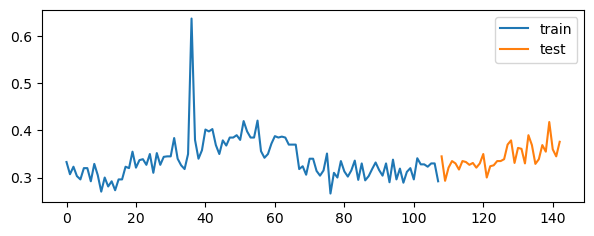

In [4]:
# Split data into train-test
# ==============================================================================
steps = int(0.25 * len(data))
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train['Date'].min()} --- {data_train['Date'].max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test['Date'].min()} --- {data_test['Date'].max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(7, 2.5))
data_train['Bulstrode'].plot(ax=ax, label='train')
data_test['Bulstrode'].plot(ax=ax, label='test')
ax.legend();

In [5]:
# Modeling and Forecasting
# ==============================================================================
from darts import TimeSeries

In [6]:
series = TimeSeries.from_dataframe(data, time_col='Date', freq=1, value_cols=['Bulstrode', 'Lydgate', 'Vincy', 'Casaubon', 'Chettam', 'Others'])
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

ValueError: Invalid frequency: 1